In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# Basen för bandit klassen
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode):
        self.Q = [0 for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.mode = mode
        
    def pull(self):
        rand = np.random.random()                            # uniform distributed number
        if rand <= self.epsilon: 
            whichArm = np.random.choice(self.numArms)        # compare a random number with epsilon , if smaller we take random action 
        elif rand > self.epsilon:
            a = np.array([approx for approx in self.Q])      # otherwise we take the argmax of the estimates of the wewards
            whichArm = np.random.choice(np.where(a == a.max())[0]) # we create a list with the max values, if we get more than one then we choose randomly
        
        self.lastAction = whichArm                                 # we keep the value of the arm         
        return np.random.randn() + self.trueRewards[whichArm]      # we return a normal distribution reward centered in the true reward for that action

    
    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1  
    
        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha
            
            
def simulate(numArms, epsilon, numPulls, mode):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        if j % 200 == 0:
            print(j)
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward
    average = rewardHistory / 2000
    return average

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


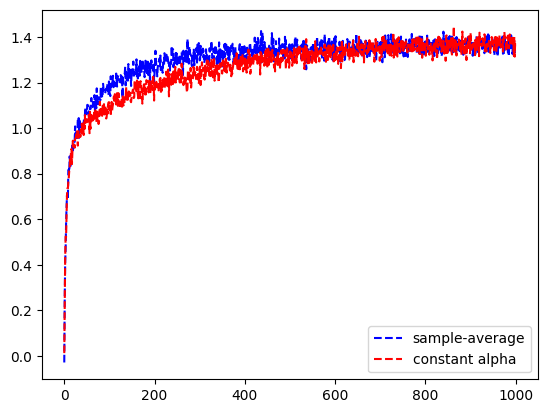

In [21]:
numActions = 10
run1 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average')
run2 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant')
plt.plot(run1, 'b--', run2, 'r--')
plt.legend(['sample-average', 'constant alpha'])
plt.show()

# Jämför resultaten för 𝜖 = 0, 𝑄1 (𝑎) = 1, 5 och 10.

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


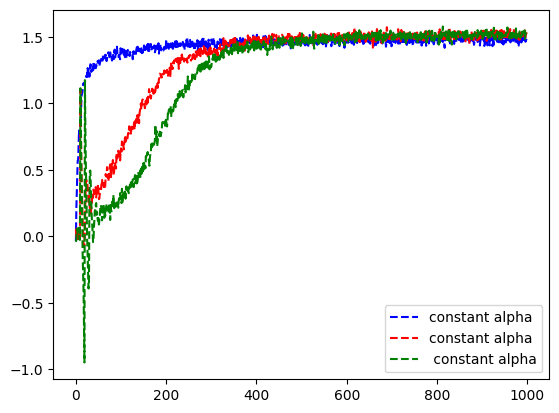

In [31]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.mode = mode
        
    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy        
            if rand <= self.epsilon:           
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0]) 

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):      
                if self.N[idx] != 0:          
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else:
                whichArm = np.random.choice(np.where(a == a.max())[0])            

        self.lastAction = whichArm       
        self.steps += 1       
        return np.random.randn() + self.trueRewards[whichArm]
    
    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1  
    
        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha
            
            
def simulate(numArms, epsilon, numPulls, mode, Q, C):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, C)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward
            
    average = rewardHistory / 2000
    return average

numActions = 10
run1 = simulate(numActions, epsilon=0, numPulls=1000, mode='constant', Q = 1, C = 0)

run5 = simulate(numActions, epsilon=0, numPulls=1000, mode='constant', Q =5, C = 0)
run10 = simulate(numActions, epsilon=0, numPulls=1000, mode='constant', Q = 10, C =0)
plt.plot(run1, 'b--', run5, 'r--', run10, 'g--')
plt.legend(['constant alpha', 'constant alpha' ,' constant alpha'])
plt.show()


# Hur resultatet från uppgift 2 ändras om vi i stället använder 𝜖 = 0.1?
- det visar sig att det blev nästan samma

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


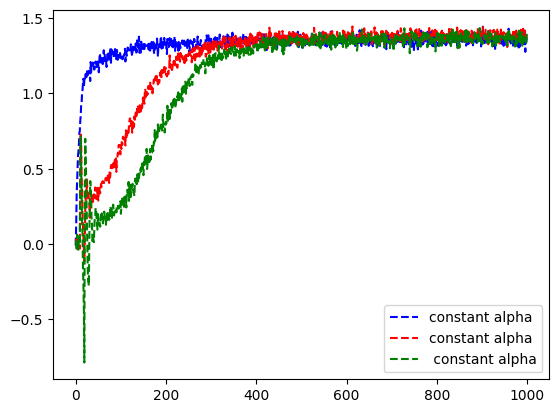

In [36]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.mode = mode
        
    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy        
            if rand <= self.epsilon:           
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0]) 

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):      
                if self.N[idx] != 0:          
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else:
                whichArm = np.random.choice(np.where(a == a.max())[0])            

        self.lastAction = whichArm       
        self.steps += 1       
        return np.random.randn() + self.trueRewards[whichArm]
    
    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1  
    
        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha
            
            
def simulate(numArms, epsilon, numPulls, mode, Q, C):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, C)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward
            
    average = rewardHistory / 2000
    return average

numActions = 10
run1 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 1, C = 0)

run5 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q =5, C = 0)
run10 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 10, C =0)
plt.plot(run1, 'b--', run5, 'r--', run10, 'g--')
plt.legend(['constant alpha', 'constant alpha' ,' constant alpha'])
plt.show()


# Jämför resultaten i det optimistiska problemet med:

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


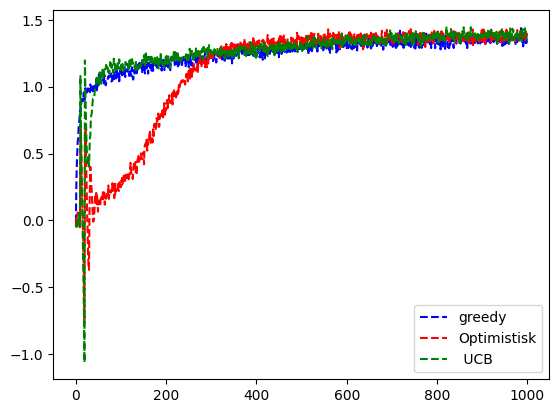

In [38]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.mode = mode
        
    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy        
            if rand <= self.epsilon:           
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0]) 

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):      
                if self.N[idx] != 0:          
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else:
                whichArm = np.random.choice(np.where(a == a.max())[0])            

        self.lastAction = whichArm       
        self.steps += 1       
        return np.random.randn() + self.trueRewards[whichArm]
    
    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1  
    
        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha
            
            
def simulate(numArms, epsilon, numPulls, mode, Q, C):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, C)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward
            
    average = rewardHistory / 2000
    return average

numActions = 10
run1 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, C = 0)
run5 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q =10, C = 0)
run10 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, C =2)
plt.plot(run1, 'b--', run5, 'r--', run10, 'g--')
plt.legend(['greedy', 'Optimistisk' ,' UCB'])
plt.show()

